Import the libraries necessary to analize data

In [15]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
import random
import seaborn as sns
import plotly.express as px

from collections import defaultdict
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
df = pd.read_csv('df_scaled.csv')

# K-means

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score

Knee Method to estimate the best K

In [18]:
k_grid = [2]

sse_list = list()

label_list = []
#min_k = 2
#max_k = 1000
dict_sse = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=11, max_iter=100)
    kmeans.fit(df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_

    dict_sse[f'{k}_sse'] = sse
    dict_sse[f'{k}_labels'] = labels

In [19]:
for k in k_grid:
    print(f'for k = {k}')
    print('SSE %s' % dict_sse[f'{k}_sse']) # cohesion, lower value better clustering (error minimization)
    print('Separation %s' % metrics.davies_bouldin_score(df, dict_sse[f'{k}_labels'])) # lower value, better clustering (minimum zero)
    print('Silhouette %s' % silhouette_score(df, dict_sse[f'{k}_labels']))

for k = 2
SSE 16921.5832642
Separation 0.7281075678917921


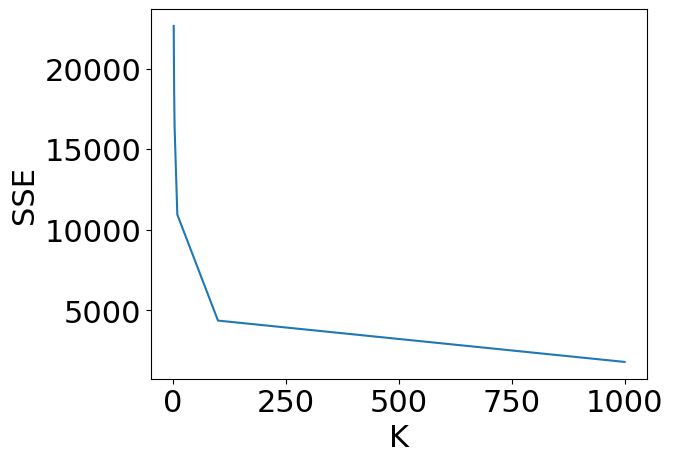

In [ ]:
sse_list = [dict_sse[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()